# **MÓDULO 13**
# Projeto - Fundamentos da Descoberta de Dados

Nesse projeto trabalharemos com a base de dados de produtos de um supermercado do Chile.
A ideia é que vocês apliquem os conceitos estatísticos vistos no último módulo, mais os conceitos de visualizações de dados através de gráficos e finalizem publicando no seu github!

In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px

Faça a leitura dos dados do arquivo CSV:


Altere o código abaixo de acordo com seu diretório.

In [35]:
df = pd.read_csv("supermercado.csv")

mapping = {
    'belleza-y-cuidado-personal': 'beleza e cuidado pessoal',
    'comidas-preparadas': 'Comidas preparadas',
    'congelados': 'Congelados',
    'frutas': 'Frutas',
    'instantaneos-y-sopas': 'Instantâneos e Sopas',
    'lacteos': 'Laticínios',
    'verduras': 'Verduras'
}

df['Categoria'] = df['Categoria'].map(mapping).fillna(df['Categoria'])

preco_normal = df[df['Preco_Normal'] > 0]

preco_desconto = df[df['Preco_Desconto'] > 0]

df.head(10)



,title,Marca,Preco_Normal,Preco_Desconto,Preco_Anterior,Desconto,Categoria
0,"Pack 12 un, Leche extra proteína 1 L",Loncoleche,19788,0,0,0,Laticínios
1,"Pack 12 un, Leche chocolate receta original 1 L",Soprole,18228,0,0,0,Laticínios
2,"Pack 12 un, Leche semidescremada chocolate 1 L",Soprole,18228,0,0,0,Laticínios
3,"Pack 12 un, Leche semidescremada frutilla 1 L",Soprole,18228,0,0,0,Laticínios
4,"Pack 12 un, Leche sin lactosa chocolate 1 L",Loncoleche,17988,0,0,0,Laticínios
5,"Pack 12 un, Leche sin lactosa frutilla 1 L",Loncoleche,17988,0,0,0,Laticínios
6,"Pack 12 un, Leche saborizada light chocolate 1 L",Loncoleche,17988,0,0,0,Laticínios
7,"Pack 12 un, Leche saborizada frutilla 1 L",Colun,17388,0,0,0,Laticínios
8,"Pack 12 un, Leche saborizada vainilla 1 L",Colun,17388,0,0,0,Laticínios
9,"Pack 12 un, Leche saborizada manjar 1 L",Colun,17388,0,0,0,Laticínios


Os campos do nosso dataframe são:

**Title:** Nome do produto.


**Marca:** A marca do produto.


**Preco_Normal:** O preço em que o produto costuma ser vendido quando não há desconto.


**Preco_Desconto:** O preço vendido após o desconto ser aplicado.


**Preco_Anterior:** Preço em que era comercializado o produto antes do desconto aplicado.


**Desconto:** Total de desconto aplicado.






As colunas que aparecem com valores 0 são para os produtos onde não tivemos descontos aplicados.


As categorias estão em espanhol!

# 1 - Traga a média e a mediana dos preços - coluna Preco_Normal - por categoria de produto.
# Identifique as categorias que parecem ter um valor de média abaixo ou acima da mediana.

In [36]:
#Seu código aqui para a média
preco_normal.groupby("Categoria")["Preco_Normal"].mean().reset_index().sort_values(by="Preco_Normal", ascending=False)


,Categoria,Preco_Normal
0,Comidas preparadas,3954.777778
4,Laticínios,3028.957386
1,Congelados,3020.670732
6,beleza e cuidado pessoal,2919.657534
2,Frutas,1724.473684
5,Verduras,1457.135593
3,Instantâneos e Sopas,1179.270270


In [37]:
#Seu código aqui para a mediana
preco_normal.groupby('Categoria')['Preco_Normal'].median().reset_index().sort_values(by='Preco_Normal', ascending=False)

,Categoria,Preco_Normal
0,Comidas preparadas,3740.0
1,Congelados,2954.0
6,beleza e cuidado pessoal,2179.0
4,Laticínios,1719.5
5,Verduras,1250.0
2,Frutas,1195.0
3,Instantâneos e Sopas,689.0


### Digite aqui as categorias:

In [38]:
resumo = (
    preco_normal
    .groupby('Categoria')['Preco_Normal']
    .agg(media='mean', mediana='median')
    .reset_index()
)

resumo['diferenca'] = resumo['media'] - resumo['mediana']
resumo['relacao'] = resumo.apply(
    lambda r: 'média maior' if r['media'] > r['mediana']
    else ('média menor' if r['media'] < r['mediana'] else 'média igual'),
    axis=1
)
resumo.sort_values('diferenca', ascending=False).reset_index(drop=True)

,Categoria,media,mediana,diferenca,relacao
0,Laticínios,3028.957386,1719.5,1309.457386,média maior
1,beleza e cuidado pessoal,2919.657534,2179.0,740.657534,média maior
2,Frutas,1724.473684,1195.0,529.473684,média maior
3,Instantâneos e Sopas,1179.270270,689.0,490.270270,média maior
4,Comidas preparadas,3954.777778,3740.0,214.777778,média maior
5,Verduras,1457.135593,1250.0,207.135593,média maior
6,Congelados,3020.670732,2954.0,66.670732,média maior


### Média > Mediana → Pode ter produtos muito caros puxando a média pra cima (outliers)

### Média < Mediana → Pode ter muitos produtos baratos puxando a média pra baixo

# 2 - Traga o desvio padrão por categoria de produto.
# Qual o comportamento da média e mediana nas categorias com maior desvio?

In [39]:
#Seu código aqui
desvios = (
    df.assign(
        Preco_Normal=df['Preco_Normal'].where(df['Preco_Normal'] > 0, pd.NA),
        Preco_Desconto=df['Preco_Desconto'].where(df['Preco_Desconto'] > 0, pd.NA)
    )
    .groupby('Categoria')[['Preco_Normal', 'Preco_Desconto']]
    .std()
    .reset_index()
    .rename(columns={
        'Preco_Normal': 'Desvio_Padrao_Preco_Normal',
        'Preco_Desconto': 'Desvio_Padrao_Preco_Desconto'
    })
)

medias = (
    df.assign(
        Preco_Normal=df['Preco_Normal'].where(df['Preco_Normal'] > 0, pd.NA),
        Preco_Desconto=df['Preco_Desconto'].where(df['Preco_Desconto'] > 0, pd.NA)
    )
    .groupby('Categoria')[['Preco_Normal', 'Preco_Desconto']]
      .mean()
      .reset_index()
      .rename(columns={
          'Preco_Normal': 'Media_Preco_Normal',
          'Preco_Desconto': 'Media_Preco_Desconto'
      })
)

mediana = (
    df.assign(
        Preco_Normal=df['Preco_Normal'].where(df['Preco_Normal'] > 0, pd.NA),
        Preco_Desconto=df['Preco_Desconto'].where(df['Preco_Desconto'] > 0, pd.NA)
    )
    .groupby('Categoria')[['Preco_Normal', 'Preco_Desconto']]
      .median()
      .reset_index()
      .rename(columns={
          'Preco_Normal': 'Mediana_Preco_Normal',
          'Preco_Desconto': 'Mediana_Preco_Desconto'
      })
)

desvios_medias = (
    desvios
    .merge(medias, on='Categoria')
    .merge(mediana, on='Categoria')
    .sort_values(by='Desvio_Padrao_Preco_Normal', ascending=False)
    .reset_index(drop=True)
)

desvios_medias



,Categoria,Desvio_Padrao_Preco_Normal,Desvio_Padrao_Preco_Desconto,Media_Preco_Normal,Media_Preco_Desconto,Mediana_Preco_Normal,Mediana_Preco_Desconto
0,Laticínios,4198.567593,1715.767502,3028.957386,1094.821918,1719.5,615.0
1,beleza e cuidado pessoal,2162.651458,1910.700320,2919.657534,3064.231707,2179.0,2690.0
2,Congelados,1904.475997,1270.231283,3020.670732,3162.560606,2954.0,3463.5
3,Frutas,1639.151114,NaN,1724.473684,NaN,1195.0,NaN
4,Comidas preparadas,1322.333503,1389.758458,3954.777778,4504.285714,3740.0,3390.0
5,Instantâneos e Sopas,1276.219431,61.318839,1179.270270,419.000000,689.0,449.0
6,Verduras,972.230682,NaN,1457.135593,NaN,1250.0,NaN


## Digite nesse campo o comportamento que você identificou.
Nas categorias com maior desvio padrão:
- Quando média >> mediana → há forte presença de outliers (ex: Laticínios).

- Quando média ≈ mediana → distribuição mais simétrica (ex: Congelados).

- Alto desvio padrão + média muito maior que mediana → grande desigualdade de preços.

# 3 - Plot um boxplot da distribuição do Preco_Normal para a categoria que você identificou que tem o maior desvio padrão. Como é a distribuição desses dados segundo o boxplot? Você identifica muitos outliers?

Dica: Para trazer apenas os dados da categoria que você deseja você pode usar o df.loc[df['Categoria'] == 'CATEGORIA ESCOLHIDA'

C:\Users\deckn\AppData\Local\Temp\ipykernel_17384\3338680928.py:5: MatplotlibDeprecationWarning:

The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.



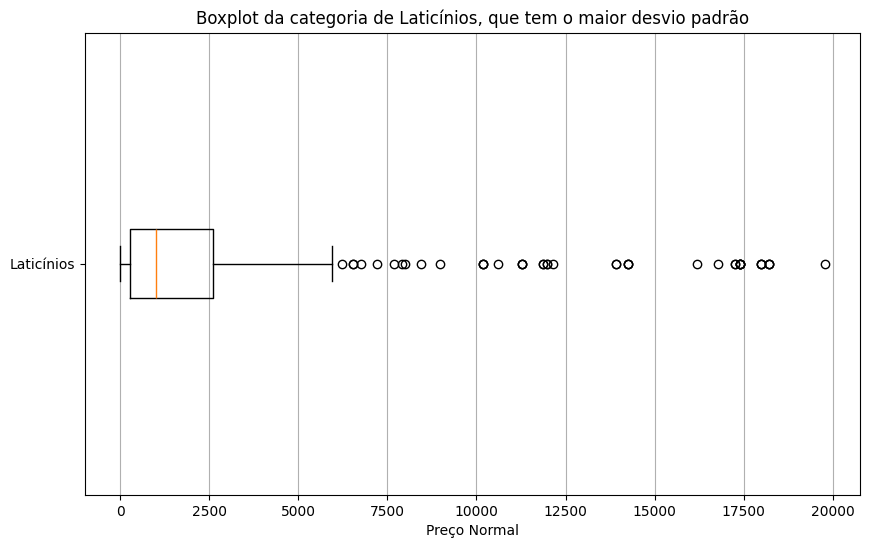

In [40]:
#Seu código aqui
plt.figure(figsize=(10,6))
categoria = df.groupby('Categoria')['Preco_Normal'].std().idxmax()
data = df.loc[df['Categoria'] == categoria, 'Preco_Normal']
plt.boxplot(data.dropna(), vert=False, labels=[categoria])
plt.xlabel('Preço Normal')
plt.title(f'Boxplot da categoria de {categoria}, que tem o maior desvio padrão')
plt.grid(axis='x')


# 4 - Plote um gráfico de barras onde temos a média de descontos por categoria.

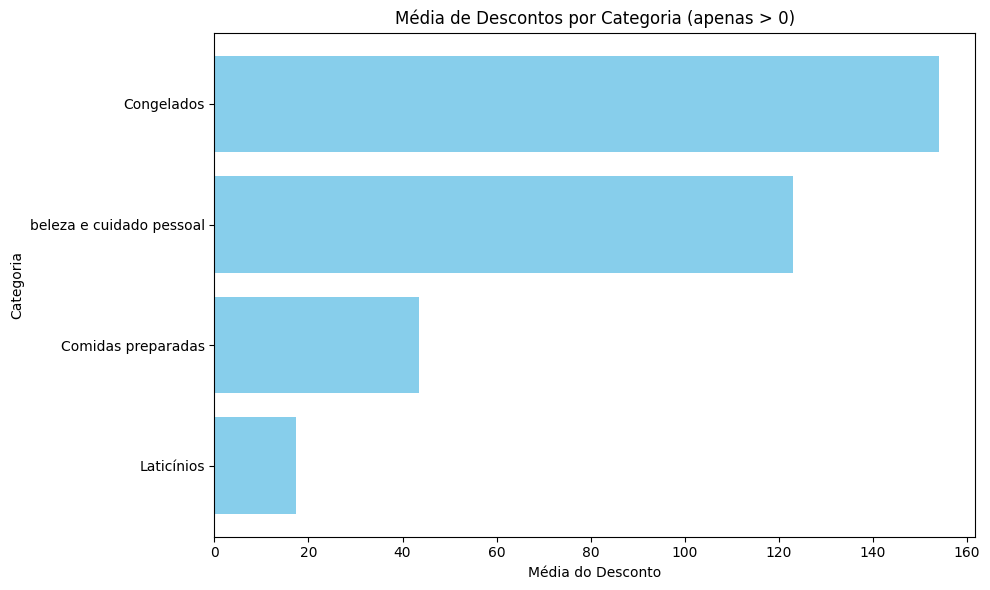

In [41]:
# Seu código aqui
plt.figure(figsize=(10,6))

# (re)calcula a média de desconto por categoria para garantir que 'grouped' exista
grouped = df.groupby('Categoria')['Desconto'].mean().reset_index()

# filtra apenas categorias com desconto > 0
grouped_filtered = grouped[grouped['Desconto'] > 0]

grouped_sorted = grouped_filtered.sort_values(by='Desconto', ascending=True)
plt.barh(grouped_sorted['Categoria'], grouped_sorted['Desconto'], color='skyblue')
plt.ylabel('Categoria')
plt.xlabel('Média do Desconto')
plt.title('Média de Descontos por Categoria (apenas > 0)')
plt.tight_layout()
plt.show()

# 5 - Plote um gráfico de mapa interativo agrupando os dados por categoria, marca e trazendo a média de desconto.

In [42]:
# Seu código aqui
grouped_map = df.groupby(['Categoria', 'Marca'])['Desconto'].mean().reset_index()
fig = px.treemap(grouped_map, path=['Categoria', 'Marca'], values='Desconto',
                 color='Desconto', color_continuous_scale='Viridis',
                 title='Média de Desconto por Categoria e Marca')
fig.update_traces(root_color="lightgrey")
fig.show()